In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from sparsecoding import inference
from sparsecoding.data.datasets import field
from sparsecoding.data.utils import load_olshausen_dictionary
from sparsecoding.visualization import plot_dictionary

### Define constants and load data

In [35]:
# Enter path of the Field dataset. If it does not exist, it will be downloaded. 
data_path = "./"
n_samples = 100
patch_size = 16
images = field.FieldDataset(patch_size=patch_size, root=data_path)

# Get n_samples, reshape to 2D, and cast to torch.float32.
data = images[:n_samples].reshape(n_samples, -1).to(torch.float32)
print(data.shape)

torch.Size([100, 256])


### Visualize patches

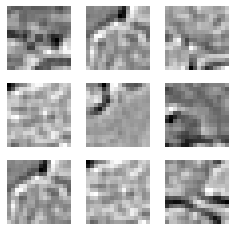

In [28]:
figure = plt.figure(figsize=(4,4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img = (data[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size,patch_size]), cmap="gray")
plt.show()

### Inference Demo | Given a random dictionary and a dataset

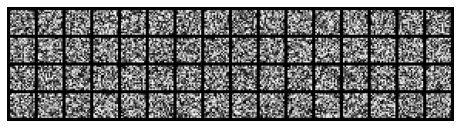

In [29]:
# Define random dictionary
n_features = patch_size**2
n_basis = patch_size*4
dictionary = 2*torch.rand([n_features,n_basis]) - 1

nrow = patch_size
fig,ax = plot_dictionary(dictionary,nrow=nrow,size=8)

In [30]:
# The Locally Competitive Algorithm
lca = inference.LCA(coeff_lr=1e-3,threshold=0.03,n_iter=300)
A = lca.infer(data[:,:],dictionary)

reconstruction = (dictionary@A.t()).t()

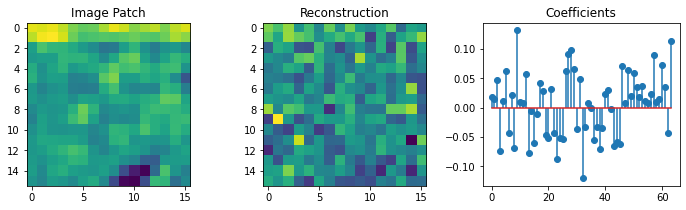

In [31]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[1,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[1,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[1,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()

### Inference Demo | Given a learned dictionary and a dataset

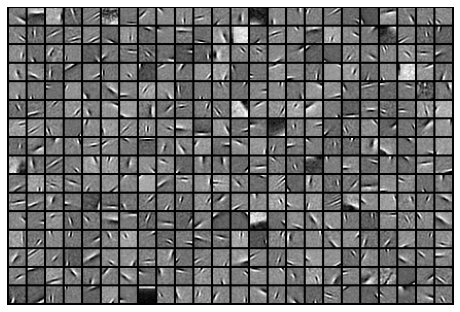

In [32]:
# load dictionary already learned on natural images
dictionary = load_olshausen_dictionary()
patch_size = int(np.sqrt(dictionary.shape[0]))
n_basis = dictionary.shape[1]

nrow = 24
fig,ax = plot_dictionary(dictionary,nrow=nrow,size=8)

In [33]:
A = lca.infer(data,dictionary)
reconstruction = (dictionary@A.t()).t()

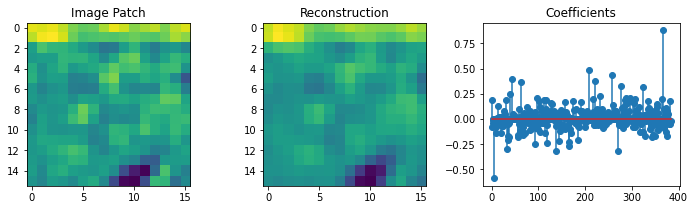

In [34]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[1,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[1,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[1,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()